# **Tight-Binding Model**

In this exercise, we explored the electronic properties of a tight-binding model on a **Tetragonal lattice** ($a = b \neq c$) with next nearest hopping on x-y plane. You should go through the introductory write-up on the tight-binding model in the folder.

##  Model

We consider a single orbital per site with the following interactions:
* **$t$**: Nearest-neighbor hopping in the x-y plane.
* **$t'$**: Next-nearest-neighbor hopping (diagonal) in the x-y plane.
* **$t_z$**: Nearest-neighbor hopping along the z-axis.

### System Specifications
* **Lattice Dimensions**: Finite lattice of $100 \times 100 \times 100$ sites.
* **Boundary Conditions**: Periodic.

![Tetragonal lattice](https://drive.google.com/uc?export=view&id=1merSYcSJgdoBkqDeNF9bWfmoDcvc5RFA)


##Hamiltonian
  In real space, the Hamiltonian describes electrons hopping between discrete lattice sites. It is given by:
  
  \begin{equation}
  \hat{H} = -t \sum_{\langle i,j \rangle_{xy}} |i\rangle \langle j| - t' \sum_{\langle\langle i,j \rangle\rangle_{xy}} |i \rangle \langle j| - t_z \sum_{\langle i,j \rangle_{z}} |i \rangle \langle j| + \text{h.c.} -\mu\sum_i |i\rangle \langle i|
  \end{equation}

  where:

  &emsp; $|i⟩$: Orbital at $i^{th}$ site.

  &emsp; $\langle i,j \rangle_{xy}$: Sum over nearest neighbors in the plane (4 bonds per site).

  &emsp; $\langle\langle i,j \rangle\rangle_{xy}$: Sum over next-nearest neighbors (diagonals) in the plane (4 bonds per site).

  &emsp; $\langle i,j \rangle_{z}$: Sum over vertical neighbors along the $z$-axis (2 bonds per site)

  &emsp; $\text{h.c.}$: Hermitian conjugate (ensures the Hamiltonian is Hermitian).

  &emsp; $\mu$: Chemical potential. We consider the system to be in contact with a reservior where it can exchange particles. Here we have **chemical potential** ($\mu$) which defines the number of particles in the system and hence defines the fermi surface.  

The **dispersion relation** $E(\vec{k})$ is given by:

$$
E(\vec{k}) = -2t [\cos(k_x a) + \cos(k_y a)] - 4t' \cos(k_x a) \cos(k_y a) - 2t_z \cos(k_z c)-\mu.
$$


We will analyze two key properties derived from the dispersion relation:

**1. Fermi Velocity**
The group velocity of electrons at the Fermi surface, defined as the gradient of the energy in k-space:
$$
\vec{v}(\vec{k}) = \frac{1}{\hbar} \nabla_{\vec{k}} E(\vec{k})
$$

**2. Inverse Effective Mass**
A tensor representing the curvature of the bands. High curvature corresponds to "lighter" effective mass and higher mobility. It is defined as:
$$
\left( \frac{1}{m^*} \right)_{ij} = \frac{1}{\hbar^2} \frac{\partial^2 E(\vec{k})}{\partial k_i \partial k_j}
$$

### Objectives
1.  Visualize the **Band Structure** along high-symmetry paths.
2.  Analyze the **Fermi Velocity** on the Fermi surface.
3.  Analyze the **Inverse Effective Mass Tensor** components ($1/m_{xx}, 1/m_{xy}, 1/m_{zz}$) on the Fermi surface.
___

In [13]:
# Importing relevant libraries
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.io as pio
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Set Plotly renderer to 'notebook' (standard for VS Code/Jupyter)
# pio.renderers.default = "notebook"

# Set static plot style
plt.rcParams.update({'font.size': 12})

## 2. Define relevant Functions
Here we define all the physics calculations and plotting logic before execution.

In [14]:
def properties(kx, ky, kz, p):
    """Calculates Energy, Velocity, and Inverse Mass at a given k-point."""
    a, b, c = 1, 1, p['c']
    t, tp, tz = p['t'], p['tp'], p['tz'] # extracting parameters

    # Energy
    E_nn = -2*t * (np.cos(kx*a) + np.cos(ky*b))
    E_nnn = -4*tp * np.cos(kx*a) * np.cos(ky*b)
    E_z = -2*tz * np.cos(kz*c)

    E = E_nn + E_nnn + E_z

    # --- 2. Fermi Velocity (First Derivatives) ---
    # vx = dE/dkx
    vx = 2*t*a*np.sin(kx*a) + 4*tp*a*np.sin(kx*a)*np.cos(ky*b)
    # vy = dE/dky
    vy = 2*t*b*np.sin(ky*b) + 4*tp*b*np.cos(kx*a)*np.sin(ky*b)
    # vz = dE/dkz
    vz = 2*tz*c*np.sin(kz*c)

    v_mag = np.sqrt(vx**2 + vy**2 + vz**2)

    # --- 3. Inverse Effective Mass (Second Derivatives) ---
    # 1/m_xx = d^2E / dkx^2
    inv_m_xx = 2*t*a**2*np.cos(kx*a) + 4*tp*a**2*np.cos(kx*a)*np.cos(ky*b)

    # 1/m_zz = d^2E / dkz^2
    inv_m_zz = 2*tz*c**2*np.cos(kz*c)

    # 1/m_xy = d^2E / dkx dky
    inv_m_xy = -4*tp*a*b*np.sin(kx*a)*np.sin(ky*b)

    return {
        'E': E,
        'vx': vx, 'vy': vy, 'vz': vz, 'v_mag': v_mag,
        'mxx': inv_m_xx, 'mzz': inv_m_zz, 'mxy': inv_m_xy
    }

def get_fermi_surface_data(p, tolerance=0.1):
    """Extracts points on the Fermi Surface."""
    Nx, Ny, Nz = p['N'], p['N'], p['N']
    a, b, c = 1, 1, p['c']

    # Create Grid for the full Brillouin Zone
    kx = np.linspace(-np.pi/a, np.pi/a, Nx)
    ky = np.linspace(-np.pi/b, np.pi/b, Ny)
    kz = np.linspace(-np.pi/c, np.pi/c, Nz)
    KX, KY, KZ = np.meshgrid(kx, ky, kz, indexing='ij')

    # Calculate Properties on the entire grid
    props = properties(KX, KY, KZ, p)

    # Filter for Fermi Surface
    mask = np.abs(props['E'] - p['mu']) < tolerance

    if np.sum(mask) == 0:
        print("No points found on Fermi surface! Try increasing tolerance or checking mu.")
        return None

    print(f"Found {np.sum(mask)} points on the Fermi surface.")

    return {
        'kx': KX[mask], 'ky': KY[mask], 'kz': KZ[mask],
        'vx': props['vx'][mask], 'vy': props['vy'][mask], 'vz': props['vz'][mask],
        'v_mag': props['v_mag'][mask],
        'mxx': props['mxx'][mask], 'mxy': props['mxy'][mask], 'mzz': props['mzz'][mask]
    }

In [15]:
def plot_band_structure(p):
    """Plots the discrete band structure along high-symmetry paths."""
    a, b, c = 1, 1, p['c']
    Nx = p['N']

    # Define High Symmetry Points
    points = [
        ('$\Gamma$', [0, 0, 0]),
        ('X',      [np.pi/a, 0, 0]),
        ('M',      [np.pi/a, np.pi/b, 0]),
        ('$\Gamma$', [0, 0, 0]),
        ('Z',      [0, 0, np.pi/c])
    ]

    k_path = []
    E_path = []
    k_dist = 0
    xticks = []
    xticklabels = []

    # Loop through segments
    for i in range(len(points) - 1):
        start_label, start_k = points[i]
        end_label, end_k = points[i+1]

        if i == 0:
            xticks.append(k_dist)
            xticklabels.append(start_label)

        # --- Calculate number of discrete steps ---
        num_points = int(Nx / 2) + 1
        segment_k = np.linspace(start_k, end_k, num_points)

        for k_point in segment_k:
            props = properties(k_point[0], k_point[1], k_point[2], p)
            E_path.append(props['E'])

        # Distance calculation
        segment_vec = np.array(end_k) - np.array(start_k)
        seg_len = np.linalg.norm(segment_vec)

        k_path.extend(np.linspace(k_dist, k_dist + seg_len, num_points))
        k_dist += seg_len

        xticks.append(k_dist)
        xticklabels.append(end_label)

    plt.figure(figsize=(10, 6))
    for x_val in xticks:
        plt.axvline(x=x_val, color='gray', linestyle='--', linewidth=1.0, alpha=0.5)
    plt.plot(k_path, E_path, '-', color='royalblue', linewidth=1.5, alpha=0.4)
    plt.plot(k_path, E_path, 'o', markersize=4, color='royalblue', alpha=0.9, label='Energy eigenvalues')
    plt.axhline(p['mu'], color='r', linestyle='--', label=f'Fermi Level $\mu={p["mu"]}$')
    plt.xticks(xticks, xticklabels, fontsize=14)
    plt.ylabel('Energy ($t$)', fontsize=14)
    plt.title(f'Band Structure (N={Nx})', fontsize=16)
    plt.grid(alpha=0.2)
    plt.legend()
    plt.xlim(0, k_path[-1])
    plt.show()

In [16]:
def plot_fermi_velocity(data):
    """
    Plots Fermi Velocity with:
    1. Surface colored by magnitude.
    2. Dense, sparse black vector arrows for direction.
    """
    kx, ky, kz = data['kx'], data['ky'], data['kz']
    vx, vy, vz = data['vx'], data['vy'], data['vz']
    v_mag = data['v_mag']

    # --- 1. Surface (High Density Scatter) ---
    surf_skip = max(1, len(kx) // 10000)
    surface_trace = go.Scatter3d(
        x=kx[::surf_skip], y=ky[::surf_skip], z=kz[::surf_skip],
        mode='markers',
        marker=dict(
            size=2.5, color=v_mag[::surf_skip], colorscale='Plasma', opacity=0.3,
            colorbar=dict(title='|v|', x=0.9, len=0.5, thickness=15)
        ),
        name='|v| Surface', hoverinfo='skip'
    )

    # --- 2. Vector Field (Black Arrows) ---
    target_vectors = 1500
    vec_skip = max(1, len(kx) // target_vectors)
    kx_v, ky_v, kz_v = kx[::vec_skip], ky[::vec_skip], kz[::vec_skip]
    vx_v, vy_v, vz_v = vx[::vec_skip], vy[::vec_skip], vz[::vec_skip]
    v_mag_v = v_mag[::vec_skip]

    grid_span = max(kx.max() - kx.min(), ky.max() - ky.min())
    scale_factor = (grid_span * 0.05) / np.max(v_mag_v) if np.max(v_mag_v) > 0 else 0

    end_x = kx_v + vx_v * scale_factor
    end_y = ky_v + vy_v * scale_factor
    end_z = kz_v + vz_v * scale_factor

    # Construct Shafts
    N = len(kx_v)
    x_lines = np.full(3 * N, np.nan); y_lines = np.full(3 * N, np.nan); z_lines = np.full(3 * N, np.nan)
    x_lines[::3], y_lines[::3], z_lines[::3] = kx_v, ky_v, kz_v
    x_lines[1::3], y_lines[1::3], z_lines[1::3] = end_x, end_y, end_z

    shaft_trace = go.Scatter3d(
        x=x_lines, y=y_lines, z=z_lines, mode='lines',
        line=dict(color='black', width=3), showlegend=False, hoverinfo='skip'
    )

    # Construct Heads
    head_trace = go.Cone(
        x=end_x, y=end_y, z=end_z, u=vx_v, v=vy_v, w=vz_v,
        colorscale=[[0, 'black'], [1, 'black']], showscale=False,
        sizemode="scaled", sizeref=0.3, anchor="tail", name='Direction'
    )

    # --- DYNAMIC LAYOUT SETTINGS ---
    # Retrieve c from global Params to set correct Z-limit
    c_val = Params['c']
    bz_z = np.pi / c_val

    tick_vals = [-np.pi, 0, np.pi]
    tick_text = ['-π', '0', 'π']
    z_tick_vals = [-bz_z, 0, bz_z]
    z_tick_text = [f'-π/{int(c_val)}', '0', f'π/{int(c_val)}']

    fig = go.Figure(data=[surface_trace, shaft_trace, head_trace])
    fig.update_layout(
        title=dict(text='Fermi Velocity profile', x=0.5, xanchor='center', yanchor='top', font=dict(size=20)),
        scene=dict(
            xaxis=dict(title='kx', range=[-np.pi, np.pi], tickvals=tick_vals, ticktext=tick_text, showticklabels=True),
            yaxis=dict(title='ky', range=[-np.pi, np.pi], tickvals=tick_vals, ticktext=tick_text, showticklabels=True),
            # Dynamic Z-axis range
            zaxis=dict(title='kz', range=[-bz_z, bz_z], tickvals=z_tick_vals, ticktext=z_tick_text, showticklabels=True),
            # 'data' mode ensures 1 unit in x = 1 unit in z.
            # If c=1, box is a Cube. If c=2, box is a flattened Cuboid.
            aspectmode='data'
        ),
        showlegend=False, width=900, height=700,
        margin=dict(l=0, r=0, b=0, t=50)
    )
    fig.show()

In [17]:
def plot_effective_mass(data, component_name, title):
    """Plots Inverse Effective Mass components on the surface."""
    kx, ky, kz = data['kx'], data['ky'], data['kz']
    values = data[component_name]
    skip = max(1, len(kx) // 5000)

    # --- DYNAMIC LAYOUT SETTINGS ---
    c_val = Params['c']
    bz_z = np.pi / c_val

    tick_vals = [-np.pi, 0, np.pi]
    tick_text = ['-π', '0', 'π']
    z_tick_vals = [-bz_z, 0, bz_z]
    z_tick_text = [f'-π/{int(c_val)}', '0', f'π/{int(c_val)}']

    fig = go.Figure()
    fig.add_trace(go.Scatter3d(
        x=kx[::skip], y=ky[::skip], z=kz[::skip], mode='markers',
        marker=dict(
            size=3, color=values[::skip], colorscale='RdBu', showscale=True,
            colorbar=dict(title=title, x=0.9, len=0.5, thickness=15), opacity=0.8
        ),
        text=values[::skip], name=title
    ))
    fig.update_layout(
        title=dict(text=f'Inverse Effective Mass: {title}', x=0.5, xanchor='center', yanchor='top', font=dict(size=20)),
        scene=dict(
            xaxis=dict(title='kx', range=[-np.pi, np.pi], tickvals=tick_vals, ticktext=tick_text, showticklabels=True),
            yaxis=dict(title='ky', range=[-np.pi, np.pi], tickvals=tick_vals, ticktext=tick_text, showticklabels=True),
            zaxis=dict(title='kz', range=[-bz_z, bz_z], tickvals=z_tick_vals, ticktext=z_tick_text, showticklabels=True),
            aspectmode='data'
        ),
        width=900, height=700, margin=dict(l=0, r=0, b=0, t=50)
    )
    fig.show()

## 3. Plots
First, we must fix the parameters of the model.

In [18]:
# Model Parameters
Params = {
    # Lattice constants
    # consider a = 1
    'c': 2.0,

    # Hopping Parameters
    't': 1,     # NN hopping (xy plane)
    'tp': 0,      # NNN hopping (xy plane)
    'tz': 1.,      # NN hopping (z axis)

    # System Parameters
    'mu': -2,   # Chemical Potential (Tuning parameter)

    # Finite Lattice Size N*N*N
    'N': 100
}

Now, we extract fermi surface data.

In [19]:
fs_data = get_fermi_surface_data(Params)

Found 26888 points on the Fermi surface.


### Band Structure plot

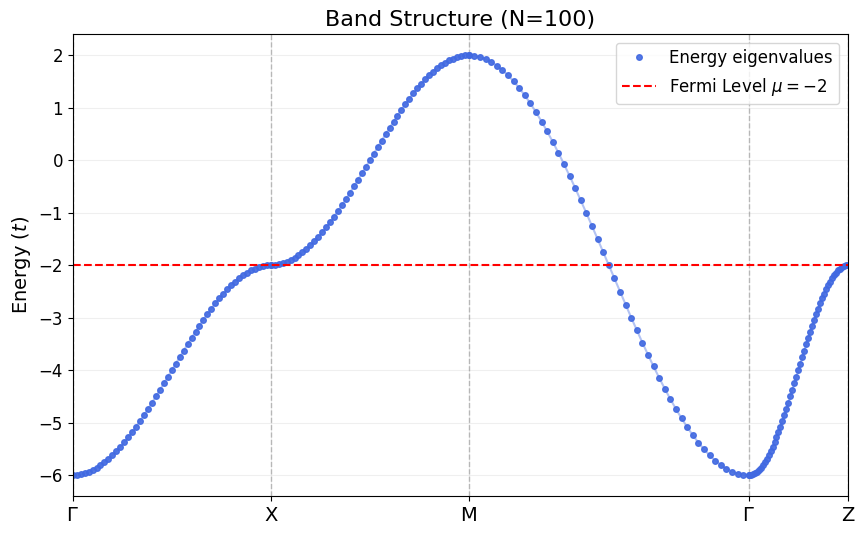

In [20]:
plot_band_structure(Params)

###  Fermi Velocity Vector Field
Color = Magnitude ($|v_F|$). Black Arrows = Direction.

In [21]:
if fs_data:
    plot_fermi_velocity(fs_data)

## Inverse Effective Mass
### 1. $\frac{1}{m_{xx}}$

In [22]:
if fs_data:
    plot_effective_mass(fs_data, 'mxx', '1/m_xx')

### 2. $\frac{1}{m_{xy}}$

In [23]:
if fs_data:
    plot_effective_mass(fs_data, 'mxy', '1/m_xy')


In [24]:
if fs_data:
    plot_effective_mass(fs_data, 'mzz', '1/m_zz')
